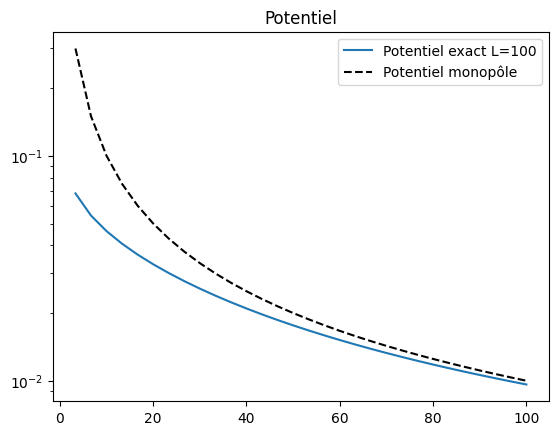

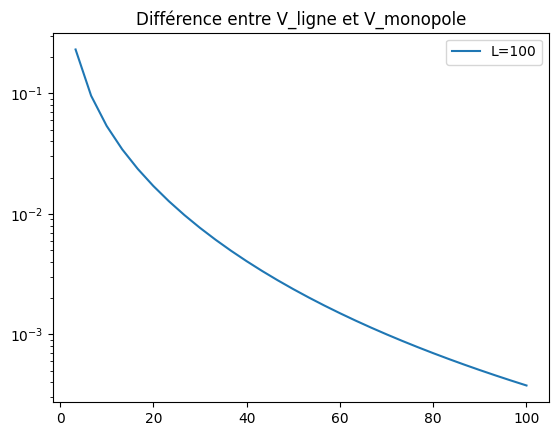

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

"""
Calculer le champ sur une ligne
===============================

La ligne est verticale (en y) et je regarde sur l'axe (y=0) en x

J'ai une ligne de charges de longueur L, discrétisée en N sous-éléments de longueur L/N
Je n'inclus pas le point L/2 (voir discussion ci-dessous)

Je veux une charge totale qui ne change pas en terme du nombre N,
donc si q = L * densité, alors densité=q/L, et dq = densité * dl,
puisque la ligne est L est en y' (en y et c'est une source), dl = dy'


"""


# Point d'observation
distance_max = 100
M = 30
X = np.linspace(distance_max/M, distance_max, M) # Je ne veux pas x=0
V_ligne = np.zeros(M) # Potentiel sur la ligne x

# Ligne de charge
q_total = 1

L = 100         # Grandeur de la ligne en y
N = 101        # Nombre de sources discrètes sur la ligne
Y_prime = np.linspace(-L/2, L/2, N, endpoint=False ) # Valeurs en y sur la ligne
dy_prime = Y_prime[1] - Y_prime[0]

densite_charge = q_total/L
dq = densite_charge * dy_prime

# Pour simplifier, je suppose que 1/(4 pi epsilon_o) = 1

for i, x in enumerate(X):
  q_total_calculee = 0

  for y_prime in Y_prime:
    r = np.sqrt(x*x+y_prime*y_prime)

    V_ligne[i] += dq/r

    q_total_calculee += densite_charge*dy_prime

  """
  Je voyais une différence de ≥ 1% entre le monopole et une charge lorsque
  L<<<1, j'étais donc convaincu que j'avais une erreur de calcul.
  Auparavant, je prenais:

  Y_prime = np.linspace(-L/2, L/2, N, endpoint=True )

  mais en faisant la boucle

  for y_prime in Y_prime:
    bla bla

  je me retrouvais à additionner un petit dy_prime de plus
  car le dernier y_prime (L/2) devenait L/2+dy_prime > L/2,
  ce qui me donnait une charge 1% plus élevée.
  J'ai mis cette vérification ci-dessous (assert) et j'ai trouvé l'erreur,
  que j'ai corrigée, avec ce que vous voyez dans le code:

  Y_prime = np.linspace(-L/2, L/2, N, endpoint=False )

  """
  assert np.isclose(q_total_calculee, q_total)



V_monopole = q_total / X

plt.plot(X, V_ligne, label=f"Potentiel exact L={L}")
plt.plot(X, q_total /X, 'k--', label=f"Potentiel monopôle")
plt.title("Potentiel")
plt.yscale('log')
plt.legend()
plt.show()

plt.plot(X, abs(V_ligne - V_monopole), label=f"L={L}")
plt.title("Différence entre V_ligne et V_monopole")
plt.yscale('log')
plt.legend()
plt.show()


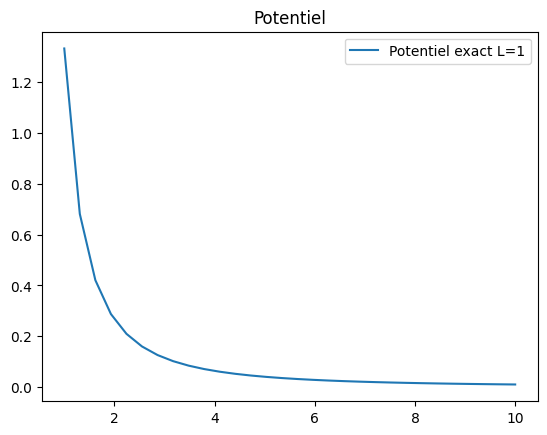

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

"""
Calculer le champ d'un dipole
===============================

"""


# Point d'observation
distance_max = 10
M = 30
X = np.linspace(1, distance_max, M) # Je ne veux pas x=0
V_dipole = np.zeros(M) # Potentiel sur la ligne x

L = 1         # Distance entre les charge (longueur du dipole)
q_plus = 1
q_moins = -1

# Pour simplifier, je suppose que 1/(4 pi epsilon_o) = 1

for i, y in enumerate(X):
    r_plus = y-L/2
    r_moins = y+L/2

    V_dipole[i] += q_plus/r_plus + q_moins/r_moins


plt.plot(X, V_dipole, label=f"Potentiel exact L={L}")
plt.title("Potentiel")
plt.legend()
plt.show()



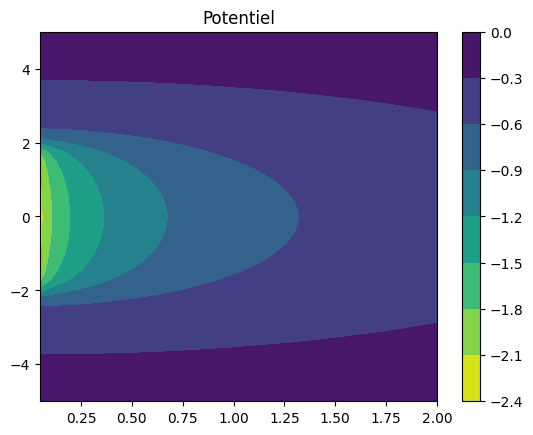

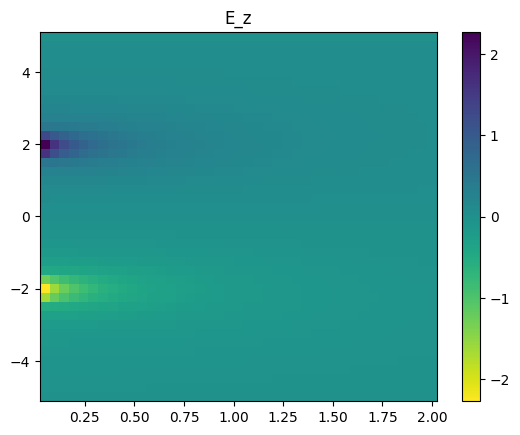

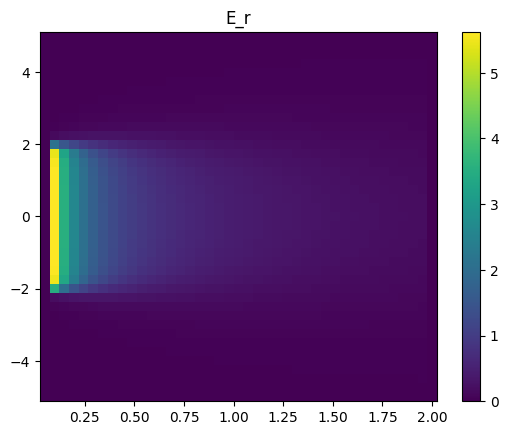

<ipython-input-17-2933124ce82c>:79: RuntimeWarning: invalid value encountered in divide
  plt.quiver(R, Z, dVdr/lengths, dVdz/lengths, colors, cmap="viridis_r")


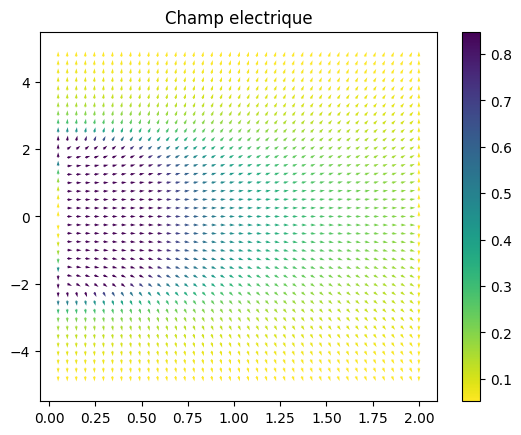

<ipython-input-17-2933124ce82c>:84: RuntimeWarning: invalid value encountered in divide
  plt.streamplot(R, Z, dVdr/lengths, dVdz/lengths, 2)


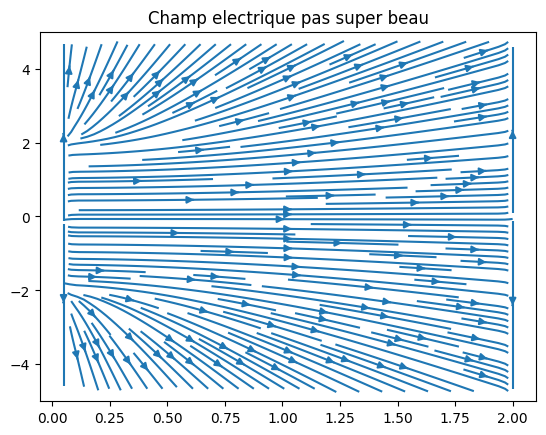

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

"""
Calculer le champ sur une ligne
===============================

La ligne est verticale (en y) et je veux le potentiel partout. Je suppose des coordonnées cylindriques.

J'ai une ligne de charges de longueur L, discrétisée en N sous-éléments de longueur L/N
Je n'inclus pas le point L/2 (voir discussion ci-dessous)

Je veux une charge totale qui ne change pas en terme du nombre N,
donc si q = L * densité, alors densité=q/L, et dq = densité * dl,
puisque la ligne est L est en z' (en z et c'est une source), dl = dz'


"""


# Point d'observation
r_max = 2
z_max = 10
M = 41
r_cyl = np.linspace(r_max/M, r_max, M)
z = np.linspace(-z_max/2, z_max/2, M)
R,Z = np.meshgrid(r_cyl, z)

V_ligne = R*0

# Ligne de charge
q_total = 1

L = 4        # Grandeur de la ligne
N = 101        # Nombre de sources discrètes sur la ligne
Z_prime = np.linspace(-L/2, L/2, N, endpoint=False )
dz_prime = Z_prime[1] - Z_prime[0]

densite_charge = q_total/L
dq = densite_charge * dz_prime

# Pour simplifier, je suppose que 1/(4 pi epsilon_o) = 1
for z_prime in Z_prime:
  r = np.sqrt((Z-z_prime)*(Z-z_prime)+R*R)
  V_ligne += -dq/r

dVdz = np.zeros(V_ligne.shape)
for i in range(1,V_ligne.shape[0]-1):
  for j in range(V_ligne.shape[1]):
    dz = Z[i+1,j]-Z[i-1,j]
    dV = (V_ligne[i+1,j]-V_ligne[i-1,j])
    dVdz[i,j] = dV/dz

dVdr = np.zeros(V_ligne.shape)
for i in range(1,V_ligne.shape[0]-1):
  for j in range(1, V_ligne.shape[1]-1):
    dr = R[i,j+1]-R[i,j-1]
    dV = (V_ligne[i,j+1]-V_ligne[i,j-1])
    dVdr[i,j] = dV/dr

lengths = np.sqrt(dVdz*dVdz + dVdr*dVdr)
percentile_10th = np.percentile(lengths, 10)
percentile_90th = np.percentile(lengths, 90)
colors = np.clip(lengths, a_min=percentile_10th, a_max=percentile_90th)

plt.contourf(R, Z, V_ligne, cmap = 'viridis_r')
plt.title("Potentiel")
plt.colorbar()
plt.show()

plt.pcolormesh(R, Z, dVdz, cmap = 'viridis_r')
plt.title("E_z")
plt.colorbar()
plt.show()
plt.pcolormesh(R, Z, dVdr, cmap = 'viridis')
plt.title("E_r")
plt.colorbar()
plt.show()
plt.quiver(R, Z, dVdr/lengths, dVdz/lengths, colors, cmap="viridis_r")
plt.title("Champ electrique")
plt.colorbar()
plt.show()
plt.title("Champ electrique pas super beau")
plt.streamplot(R, Z, dVdr/lengths, dVdz/lengths, 2)
plt.show()
